### Лайко Рудольф. ИАД04
### Домашнее задание 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import random
import math
from scipy import linalg
from scipy import integrate
from scipy import optimize
from scipy import interpolate

### 1
$f(x) = \frac12 \log(|x|+1)$ и $g(x) = \min(\sqrt{|x|}, e^x)$ на отрезке $[-10, 10]$.


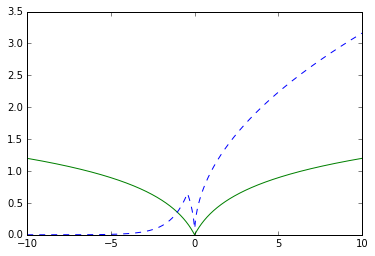

In [291]:
f = 1/2*np.log(np.fabs(x) + 1)
g = np.minimum(np.sqrt(np.fabs(x)), np.exp(x)) 

x = np.linspace(-10.0, 10.0, 1000) 

plt.plot(x, f, 'g', x, g, 'b--')

### 2


In [282]:
y1 = [2, 9, 8, 7, 4, 6, 3, 1, 2, 3, 2, 3]
y2 = [3, 4, 3, 4, 5, 3, 2, 2, 3, 4]

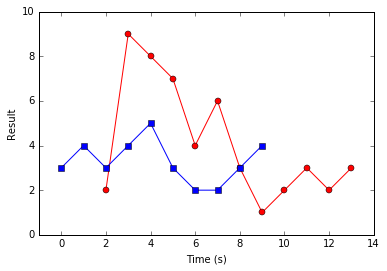

In [286]:
x1 = np.arange(2, 14, 1) 
x2 = np.arange(0, 10, 1) 

plt.axis([-1, 14, 0, 10])
plt.xlabel('Time (s)') 
plt.ylabel('Result') 
plt.plot(x1, y1, 'ro-', x2, y2, 'bs-')

### 3

In [275]:
y = [1, 2, 7, 9, 10, 8, 5, 4, 3]

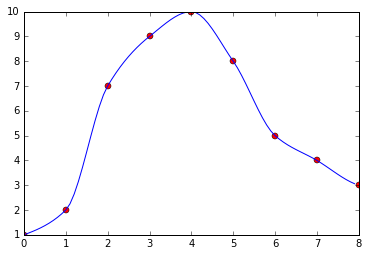

In [280]:
x = np.arange(0, 9, 1) 

f = interpolate.PchipInterpolator(x, y) 

plt.plot(x, y, 'ro', np.arange(0, 8, 0.1), f(x1), '-')

### 4

$$
f(x, y) = \left( 3 + 2(x-y)^2 + 1.5 e^{x + y} + 2 x^2 - 2.5y \right)^2
$$

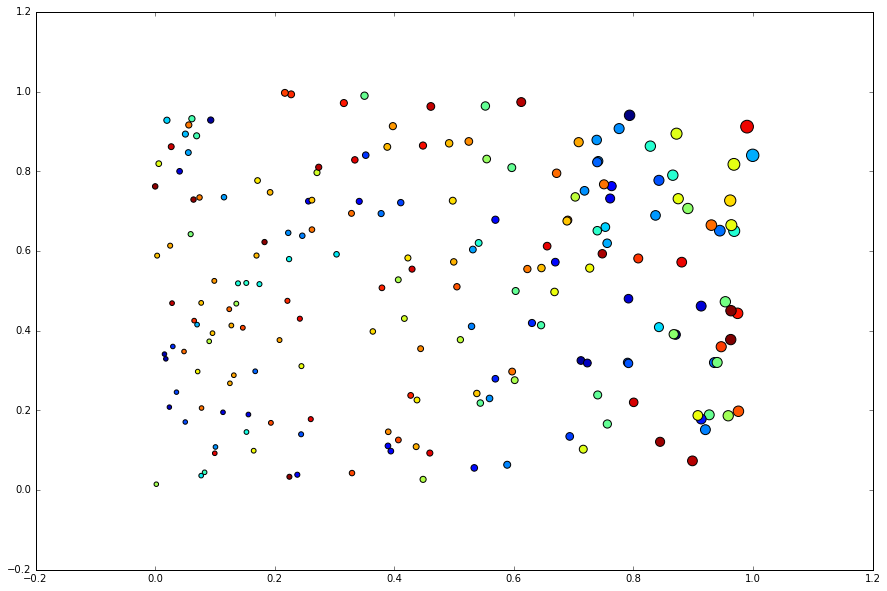

In [268]:
n = 200

x = np.random.rand(n) 
y = np.random.rand(n) 

colors = np.random.rand(n) 

area = np.square(3 + 2 * np.square(x - y) + 1.5*np.exp(x + y) + 2 * np.square(x) - 2.5 * y) 

fig = plt.figure(figsize=(15, 10))
plt.scatter(x, y, s=area, c=colors, alpha=1)
plt.show()

### 5

$$
f(x, y) = 4x^2 - 15x + 4
$$

-10.062499821222364
Optimization terminated successfully.
         Current function value: -10.062500
         Iterations: 27
         Function evaluations: 54


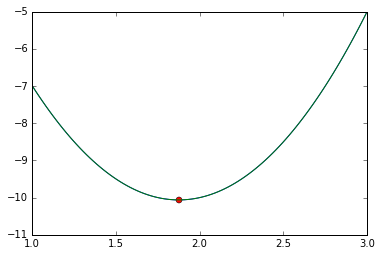

In [259]:
f = lambda x: 4*x**2 - 15*x + 4

a = -10 
b = 10 
epsilon = 0.001 


while abs(b-a) > 2 * epsilon: 
    x1 = (a + b)/2 - epsilon/2 
    x2 = (a + b)/2 + epsilon/2 
    if f(x1) > f(x2): 
        a = x1 
    else: 
        b = x2 

print(f((a + b) / 2))
x = np.linspace(1, 3, 100) 
plt.plot(x, f(x)) 

x_min = optimize.fmin(f, 0) 
plt.plot([x_min], [f(x_min)], 'ro') 
plt.plot(x, f(x))

### 6
$$
f(x, y) = x^3 + x^2
$$

Результат мо методу Монте-Карло:
17.335064114143893
Результат интегрирования:
18.0


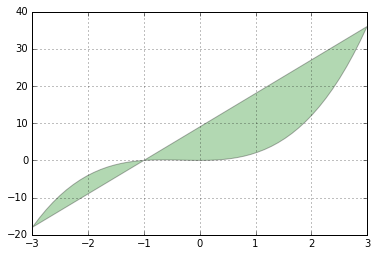

In [295]:
f = lambda x: x**3 + x**2

s = 0 
x = 0 

def MC(f, a, b, n):
    s = 0
    for i in range(0, n): 
        x = random.uniform(a, b) 
        s = s + f(x) 
        result = (b - a)*s/N 
    return result

print("Результат мо методу Монте-Карло:") 
print(MC(f, -3, 3, 400)) 

result = integrate.romberg(f, -3, 3) 
print("Результат интегрирования:") 
print(result)

x = np.linspace(-3, 3)
y = x**3 + x**2

plt.fill(x, y, 'g', alpha = 0.3)
plt.grid(True)
plt.show()

### 7 Power Iteration

This article was used: http://ergodic.ugr.es/cphys/LECCIONES/FORTRAN/power_method.pdf
(метод нерабочий, запутася

In [2]:
# метод PowerIteration находит максимальное собственное число матрицы А степенным методом c точностью до 0.0001
# производя до 1000 итераций
# возвращает максимальное собсвтенное число, либо None если такого нет

def PowerIteration(A):
    x = np.ones((3,1))
    x_i = x
    x_i = A * x_i 
    lambda1,lambda2 = 0, 0
    lambda1 = x_i[0,0] / x[0,0] 
    for i in range(1, 1000):
        x = x_i
        x_i = A*x_i
        lambda1 = lambda2
        lambda2 = x_i[0,0] / x[0,0] 
        if (np.fabs(lambda2 - lambda1) < 10e-4):
            return lambda2
    return None

In [4]:
A_matrix = np.matrix([[5, 6, 3], [-1, 0, 1], [1, 2, -1]])

eigv, eigvec = sp.linalg.eig(A_matrix)
max_eigv = max(eigv)

print("Scipy result: ", max_eigv)
print("PowerIteration result: ",  PowerIteration(A_matrix))

Scipy result:  (4+0j)
PowerIteration result:  4.00081413336


array([[ 5,  6,  3],
       [-1,  0,  1],
       [ 1,  2, -1]])